# Predicting the FIFA World Cup - Li Chen
### <span style="color:#83898b">*Forecasting the outcome of the 2022 World Cup based on previous results*</span>

Hailed as the most prestigious sports tournament in the entire world, the FIFA Men’s World Cup is the pinnacle of soccer matches and is the embodiment of pride and patriotism. In this assignment, I wanted to explore the aspects of a country’s soccer team and how these factors affected the country’s chances of winning their World Cup games. Started in 1930, the FIFA World Cup is a quadrennial soccer tournament where 32 countries fight for the right to be named the greatest soccer team in the world. Ever since its conception, 79 difference countries have had the opportunity to play in the World Cup with each country having played and won qualification matches in their respective continent’s leagues to even get the right to join the tournament. Only 8 different countries have won the whole tournament, with Brazil winning the most at 5 titles and the most recent title holders being France at the 2018 World Cup. The World Cup has a such a long history that FIFA has even ranked the countries according to their match results. Records of all international matches, whether as part of the World Cup, the Continent’s league or friendlies, contribute to a country’s ranking. History suggests that there are definite favourites to win the World Cup, eg. France, Italy, Germany, etc., who all have a high FIFA ranking, but in some years, there have been major upsets with favourites being knocked out early in the tournament. History also suggests that countries considered as the home team, in any sport, would have an advantage of winning the match as fan support and familiarity help provide a boost to the home team’s performance. I will explore the relationship between these two variables (i.e., FIFA ranking, home team country) and the number of goals scored, as well as the outcome of the match in the World Cup Tournament. 

Data on the results, score, FIFA ranking and home team status was obtained from a FIFA World Cup dataset by Brenda_L on Kaggle. This dataset was uploaded onto and is publicly maintained on [Kaggle](https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022), a free online resource for datasets.

![world cup trophy](http://img.bleacherreport.net/img/images/photos/002/975/442/hi-res-6590d5d897933931840ca893be28ab4f_crop_north.jpg?1405281115&w=9999&h=9999)

<sup>Clive Rose (Getty Images), Public domain, via [Bleacher Report](https://bleacherreport.com/articles/2128231-world-cup-2014-trophy-weight-fifa-prize-history-gold-carat-details-and-more)</sup>

## Methods
### Data Collection

This World Cup data was obtained from [Kaggle](https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022), a free online resource for datasets.[1]

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading Data
matches = pd.read_csv('international_matches.csv')

### Data Cleaning


The World Cup dataset had 15 columns of data that was not necessary for this assginment. These columns were removed to obtain more concise data.

In [3]:
# Dropping all columns that are not necessary 
matches.drop(["home_team_continent", "away_team_continent", "home_team_total_fifa_points", "away_team_total_fifa_points", "home_team_goalkeeper_score", "away_team_goalkeeper_score", "home_team_mean_defense_score", "away_team_mean_defense_score", "home_team_mean_offense_score", "away_team_mean_offense_score", "home_team_mean_midfield_score", "away_team_mean_midfield_score", "city", "country", "neutral_location"], axis= 1, inplace=True)

The World Cup dataset also contains rows of match data where the match was played in tournaments other than the World Cup (i.e., UEFA Euros, Friendlies, African Cup of Nations). These rows were removed so only World Cup data could be analyzed.

In [4]:
# Dropping all rows that do not contain the value FIFA World Cup in the tournament column
matches = matches[matches["tournament"] == "FIFA World Cup"]

The shoot out data was also recoded to allow for numical summerization

In [5]:
# Dictionary like replacement of shoot_out columns
matches = matches.replace({'shoot_out': {'Yes' : 1, 'No' : 0}})

## Analyses

I will explore the relationships between FIFA ranking and home team country on number of goals scored and outcome of the match. This relationship will be visualized through exploratory analyses, which involve statistical summaries, graphs and plots.

### Distributions

I will start by first exploring the distributions of the World Cup dataset. The figure below shows the distribution of the FIFA ranks of countries considered as the home team during World Cup matches. As shown through the figure, the majority of the countries that participate as the home team in the World Cup have a FIFA rank from 1 to 40.

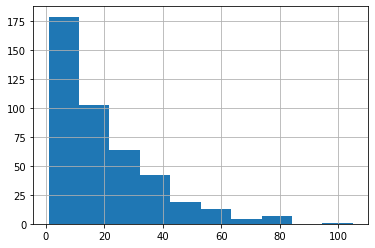

In [6]:
# Rank Distribution for Home Teams
h1 = matches.home_team_fifa_rank.hist(bins=10)

The figure below shows the distribution of the FIFA ranks of countries considered as the away team during World Cup matches. As shown in the figure, the majority of the countries that participate as the away team in the World Cup have a FIFA rank from 1 to 40, similar to the home team FIFA rank distribution. Unlike the home team FIFA rank, the away team FIFA rank seems to be more evenly distributed within this 1 to 40 range. This can be seen as there were a lot more away teams that had a FIFA rank within the 20-30 range than seen in the home team rank distribution (around 90 instances vs about 60 instances, for away and home teams respectively). As well, away teams had significantly less instances of having a 1 to 10 ranking with just under 140 cases, whereas in the home team FIFA rank distribution the number of home teams with the 1 to 10 ranking numbered at just over 175 instances. This suggests that the higher ranked teams were more likely to be considered as the home team. 

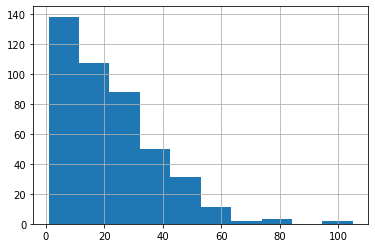

In [7]:
# Rank Distribution for Away Teams
h2 = matches.away_team_fifa_rank.hist(bins=10)

A descriptive analysis of the home team FIFA rank shows that the average FIFA rank of a home team is around 19 or 20 with a standard deviation of 17.57. It is also seen that the highest rank for a home team was 1 and the lowest rank for a home team was 105.

In [8]:
# Descriptive statistics of home team FIFA rank
ds1 = matches.home_team_fifa_rank.describe()
print(f"Mean rank: {round(ds1['mean'],2)}")
print(f"Standard Deviation: {round(ds1['std'],2)}")
print(f"Highest rank: {round(ds1['min'])}")
print(f"Lowest rank: {round(ds1['max'])}")

Mean rank: 19.54
Standard Deviation: 17.57
Highest rank: 1
Lowest rank: 105


A descriptive analysis of the away team FIFA rank shows that the average FIFA rank of an away team is around 21 or 22 with a standard deviation of 16.34. It is also seen that the highest rank for an away team was 1 and the lowest rank was 105, which makes sense as each country plays multiple matches within the World Cup and would have the chance to play as home and away. The decrease in mean rank from 19 or 20 to 21 or 22, shows that away teams tend to be lower ranked teams. The standard deviation of away teams being much lower than the standard deviation of home teams further supports the idea that away teams tend to have a lower rank, as a smaller standard deviation means less variation and the ranks of the away teams would be closer to the mean rank value than the home team ranks.

In [9]:
# Descriptive statistics of home team FIFA rank
ds2 = matches.away_team_fifa_rank.describe()
print(f"Mean rank: {round(ds2['mean'],2)}")
print(f"Standard Deviation: {round(ds2['std'],2)}")
print(f"Highest rank: {round(ds2['min'])}")
print(f"Lowest rank: {round(ds2['max'])}")

Mean rank: 21.77
Standard Deviation: 16.34
Highest rank: 1
Lowest rank: 105


The distribution of goals scored for home teams is right skewed, with home teams scoring either one or two goal or no goals at all. The distribution also indicates that the maximum number of goals a home team has scored was 8 goals.  

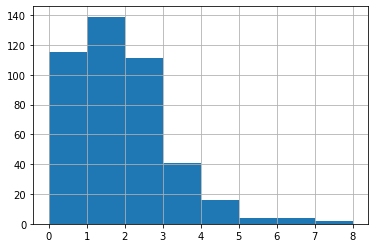

In [10]:
# Distribution of Goals Scored for Home Teams 
h3 = matches.home_team_score.hist(bins=8)

On the other hand, the distribution of the goals conceded by home teams or the goals scored by away teams is also right skewed, but home teams are more prone to only concede zero or one goal. The maximum number of goals a home team has every conceded was 7 goals. 

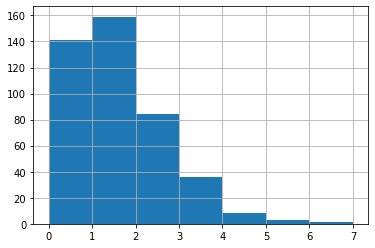

In [11]:
# Distribution of Goals Conceded for Home Teams 
h4 = matches.away_team_score.hist(bins = 7)

Home team results are unequally distributed, with home teams winning more than losing or drawing. The likelihood of the home team drawing with their opponent was also found to be less likely than the home team losing. 

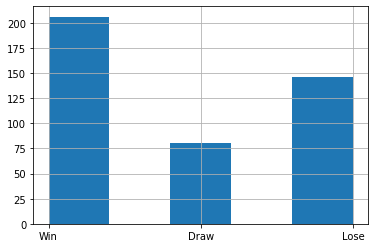

In [12]:
# Distribution of Home Team Results 
h5 = matches.home_team_result.hist(bins=5)

### FIFA Rank and Outcome

The table below shows the top 5 home team FIFA ranks with the most home wins. Based on FIFA rank, an interesting pattern was discovered whereby home teams that had a FIFA ranking that was within or close to the 1 to 10 range had a high chance of winning their match or won more of their matches. Surprisingly, the second ranked team won more of their matches than the first ranked team. 

In [13]:
# Grouped Operations to determine FIFA ranks of home teams that won the most  
grouped_matches_FRO = matches.groupby(['home_team_fifa_rank', 'home_team_result']).size().unstack()
wins = grouped_matches_FRO[grouped_matches_FRO.Win > 0].sort_values(by=['Win'], ascending=False)
wins.loc[:, ["Win"]].head()

home_team_result,Win
home_team_fifa_rank,
2,17.0
1,15.0
3,12.0
7,12.0
5,11.0


The table below shows the top 5 home team FIFA ranks with the least number of home wins. Home teams ranked 30 or below had much less wins than higher ranked teams, with these teams only managing to win one of their games. This suggests that the higher a home team’s FIFA ranking is the more likely they are to win the match. As well, it is more likely that the second ranked team would win more matches than the first team if they were the home team. This was seen as the second ranked team was shown to have 17 wins compared to 15 wins by the first ranked teams. Teams ranked 9th and 10th  were also found to not be within the top 10 home teams in terms of number of wins. 

In [14]:
# Grouped Operations to determine FIFA ranks of home teams that won the least
grouped_matches_FRO2 = matches.groupby(['home_team_fifa_rank', 'home_team_result']).size().unstack()
wins = grouped_matches_FRO2[grouped_matches_FRO2.Win > 0].sort_values(by=['Win'])
wins.loc[:, ["Win"]].head()

home_team_result,Win
home_team_fifa_rank,
83,1.0
31,1.0
33,1.0
35,1.0
36,1.0


The table below depicts the top 5 home team FIFA ranks with the most losses at home. In terms of home team losses, the 34th ranked team had the most losses as a home team, but the high ranked teams were not far behind. Teams ranked first or second in the FIFA rankings, when playing at home also lost a lot of times with first ranked teams losing 6 times and second ranked teams losing 5 times. 

In [15]:
# Grouped Operations to determine FIFA ranks of home teams that lost the most 
grouped_matches_FRO3 = matches.groupby(['home_team_fifa_rank', 'home_team_result']).size().unstack()
lose = grouped_matches_FRO3[grouped_matches_FRO3.Lose > 0].sort_values(by=['Lose'], ascending=False)
lose.loc[:, ["Lose"]].head()

home_team_result,Lose
home_team_fifa_rank,
34,8.0
7,6.0
1,6.0
2,5.0
12,5.0


The table below shows the top 5 home team FIFA ranks with the most draws at home games. Home teams that drew most of their matches had FIFA rankings that were quite high. Teams ranked within the top ten of the FIFA rankings drew more matches than other ranked teams, with the third, fifth and eighth ranked teams all racking up 4 draws. 

In [16]:
# Grouped Operations to determine FIFA ranks of home teams that drew the most 
grouped_matches_FRO4 = matches.groupby(['home_team_fifa_rank', 'home_team_result']).size().unstack()
draw = grouped_matches_FRO4[grouped_matches_FRO4.Draw > 0].sort_values(by=['Draw'], ascending=False)
draw.loc[:, ["Draw"]].head()

home_team_result,Draw
home_team_fifa_rank,
3,4.0
5,4.0
24,4.0
8,4.0
23,3.0


The table below shows the top 5 away team FIFA ranks with the most wins. Away teams with a high FIFA rank, won a lot more of their matches with the second ranked team winning 14 matches while playing as the away side. Surprisingly, the first FIFA ranked team was not among the top away teams to win their matches.

In [17]:
# Grouped Operations to determine FIFA ranks of away teams that won the most 
grouped_matches_FRO5 = matches.groupby(['away_team_fifa_rank', 'home_team_result']).size().unstack()
win2 = grouped_matches_FRO5[grouped_matches_FRO5.Lose > 0].sort_values(by=['Lose'], ascending=False)
win2.loc[:, ["Lose"]].head()

home_team_result,Lose
away_team_fifa_rank,
2,14.0
7,10.0
8,8.0
5,7.0
15,7.0


The table shown below illustrates the top 5 away team FIFA ranks with the most losses. Away teams with a middle FIFA ranking (20th to 50th rank), lost a lot of their matches. Astonishingly, the fifth and fourth ranked teams were amongst the away teams that lost a lot of their away matches.

In [18]:
# Grouped Operations to determine FIFA ranks of away teams that lost the most 
grouped_matches_FRO6 = matches.groupby(['away_team_fifa_rank', 'home_team_result']).size().unstack()
loss2 = grouped_matches_FRO6[grouped_matches_FRO6.Win > 0].sort_values(by=['Win'], ascending=False)
loss2.loc[:, ["Win"]].head()

home_team_result,Win
away_team_fifa_rank,
5,10.0
21,10.0
23,7.0
47,6.0
4,6.0


The table below shows the top 5 away team FIFA ranks that had the most draws. Away teams ranked 10th and below in the FIFA standings drew a lot of their matches. Shockingly the fourth FIFA ranked team had a high number of draws as well. 

In [19]:
# Grouped Operations to determine FIFA ranks of away teams that drew the most 
grouped_matches_FRO7 = matches.groupby(['away_team_fifa_rank', 'home_team_result']).size().unstack()
draw2 = grouped_matches_FRO7[grouped_matches_FRO7.Draw > 0].sort_values(by=['Draw'], ascending=False)
draw2.loc[:, ["Draw"]].head()

home_team_result,Draw
away_team_fifa_rank,
10,5.0
23,4.0
4,4.0
34,3.0
57,3.0


Figure 6 shows the FIFA ranks of the home teams that were in the top 10 in terms of winning their home match. This count plot helps to justify the values obtained in the tables above and clearly shows that the higher ranked teams not only have a high number of wins, but a relatively low number of wins and draws. The second ranked FIFA team was also shown to be much better than the first ranked team at home as not only are their number of wins higher, but their number of losses were also less. 

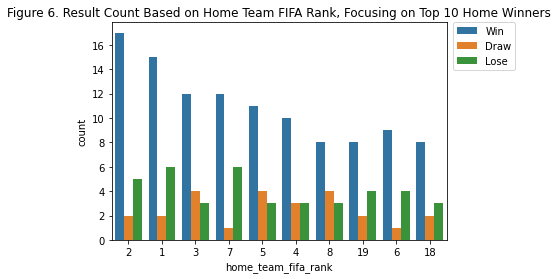

In [20]:
# Count Plot for results of top 10 FIFA rank Home Teams that Won the most
p = sns.countplot(data=matches, x="home_team_fifa_rank", hue="home_team_result", order=matches.home_team_fifa_rank.value_counts().iloc[:10].index).set(title= "Figure 6. Result Count Based on Home Team FIFA Rank, Focusing on Top 10 Home Winners")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


### FIFA Rank and Number of Goals Scored

The table below indicates that home teams with a relatively low FIFA ranking had an average home team score that was high. The top 5 home team FIFA ranks with the most home team goals are shown below. The average number of goals scored for low ranked teams were around 2 to 3 goals per home game. 

In [21]:
# Grouped Operations to determine the average home team score per home team FIFA rank
grouped_matches_FRGS = round(matches.groupby('home_team_fifa_rank')[['home_team_score']].mean(), 2)
grouped_matches_FRGS = grouped_matches_FRGS.sort_values(by='home_team_score', ascending=False)
grouped_matches_FRGS.head()

,home_team_score
home_team_fifa_rank,
39,3.00
70,2.67
67,2.00
42,2.00
6,1.93


On the contrary, middle ranked teams had an average away team score that was high. The average number of goals scored for middle ranked teams was around 2 goals per away game. This table also showed two surprises where the highest scoring away team had a very low ranking of 74 and the second highest scoring away team was the second ranked team. Shockingly, the first ranked team was not found as the top scorer as a home or away team. This table shows the top 5 away team FIFA ranks with the most away goals.

In [22]:
# Grouped Operations to determine the average away team score per away team FIFA rank
grouped_matches_FRGS2 = round(matches.groupby('away_team_fifa_rank')[['away_team_score']].mean(), 2)
grouped_matches_FRGS2 = grouped_matches_FRGS2.sort_values(by='away_team_score', ascending=False)
grouped_matches_FRGS2.head()

,away_team_score
away_team_fifa_rank,
74,3.00
2,2.13
15,2.00
37,1.67
27,1.67


The below regression plot demonstrates that as the home team FIFA rank decreases (i.e., gets larger in value and moves further away from 1) the number of goals they score also decreases, but this relationship is relatively weak due to the regression line having a slight negative slope. 

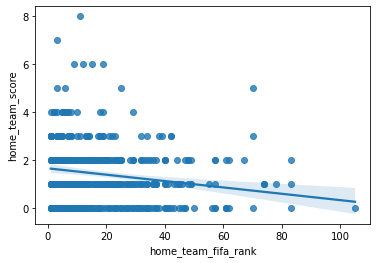

In [23]:
# Regression plot for home team FIFA rank vs home team score 
p = sns.regplot(x='home_team_fifa_rank', y='home_team_score', data=matches)

Like the regression plot above, the regression plot below shows that as the away team FIFA rank decreases, the number of goals they score also decreases. This relationship is also weak due to the small slope of the regression line. 

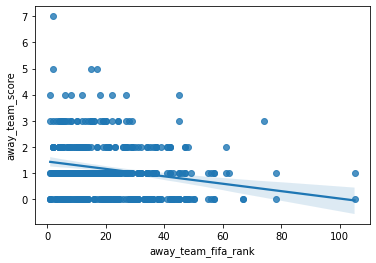

In [24]:
# Regression plot for away team FIFA rank vs away team score 
p = sns.regplot(x='away_team_fifa_rank', y='away_team_score', data=matches)

### FIFA Rank and Number of Goals Conceded

The below table shows that the lower ranked FIFA teams tended to let in more goals at home, with the number of goals they conceded between 2 and 4 goals. The top 5 home team FIFA ranks with the most goals conceded are shown below.

In [25]:
# Grouped Operations to determine average goals conceded per home team FIFA rank 
grouped_matches_FRGC = round(matches.groupby('home_team_fifa_rank')[['away_team_score']].mean(), 2)
grouped_matches_FRGC = grouped_matches_FRGC.sort_values(by='away_team_score', ascending=False)
grouped_matches_FRGC.head()

,away_team_score
home_team_fifa_rank,
56,4.00
105,3.00
62,3.00
74,2.33
34,2.10


The table below also shows that the lower ranked FIFA teams let in more goals at away games. The number of goals these teams let in was between 3 to 5 goals. The top 5 away team FIFA ranks with the most goals conceded are shown below.

In [26]:
# Grouped Operations to determine average goals conceded per away team FIFA rank 
grouped_matches_FRGC2 = round(matches.groupby('away_team_fifa_rank')[['home_team_score']].mean(), 2)
grouped_matches_FRGC2 = grouped_matches_FRGC2.sort_values(by='home_team_score', ascending=False)
grouped_matches_FRGC2.head()

,home_team_score
away_team_fifa_rank,
105,4.5
55,4.5
50,3.5
47,3.0
67,3.0


The regression plot below shows that as the home team FIFA rank decreased the more goals they conceded. There also seemed to be an outlier where a high ranking home team (i.e., team in the top 10 FIFA standings) conceded 7 goals.

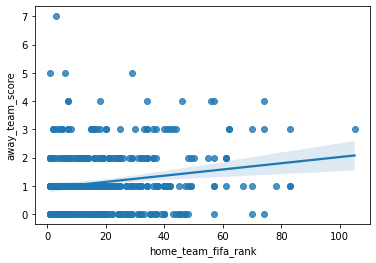

In [27]:
p = sns.regplot(x='home_team_fifa_rank', y='away_team_score', data=matches)

The regression plot below also shows that as the away team FIFA rank decrease the more goals they conceded. This means that if a low ranked team were to play as an away team they would most likely let in more goals. This regression plot can be seen to have a moderate to low relationship as the slop of the regression line is much larger than the previous regression plot.

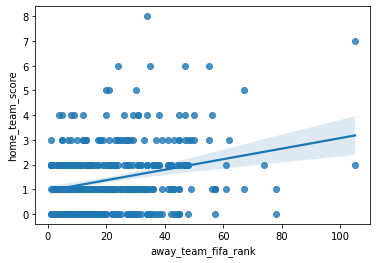

In [28]:
p = sns.regplot(x='away_team_fifa_rank', y='home_team_score', data=matches)

### Home Team Country and Outcome

The table below shows the top 5 home team countries with the most wins. As shown in the table, Brazil and Germany are the top 2 home team countries with the most wins, indicating that they have a higher chance than other countries to win at home. 

In [29]:
grouped_matches_HTCO = matches.groupby(['home_team', 'home_team_result']).size().unstack()
wins = grouped_matches_HTCO[grouped_matches_HTCO.Win > 0].sort_values(by=['Win'], ascending=False)
wins.loc[:, ["Win"]].head()

home_team_result,Win
home_team,
Brazil,24.0
Germany,21.0
Argentina,17.0
France,14.0
Netherlands,12.0


The table below shows the top 5 home team countries with the most losses. What is interesting in this table is that although Germany was considered as a country with one of the most wins at home, according to the table above, they also have a high record of losing at home. Although their number of home losses, which equals 6, is among the highest for home teams, their number of wins is still significantly higher (i.e., 21 wins), which suggests that although there is a chance for Germany to lose at home it is more likely that they will win. 

In [30]:
grouped_matches_HTCO2 = matches.groupby(['home_team', 'home_team_result']).size().unstack()
lose = grouped_matches_HTCO2[grouped_matches_HTCO2.Lose > 0].sort_values(by=['Lose'], ascending=False)
lose.loc[:, ["Lose"]].head()

home_team_result,Lose
home_team,
Japan,6.0
Germany,6.0
USA,6.0
Korea Republic,6.0
Spain,5.0


The table below shows the top 5 home team countries with the most draws. Italy has had the most draws as the host team with 5 draws. Another interesting detail that was discovered was that France, who is amongst the top 5 home team winners with 14 wins, also has a tendency to draw games as well, drawing 3 home games. Again the number of draws that France has at home is significantly lower than the number of wins they have at home, indicating that France has a higher tendency to win home games than to draw them.

In [31]:
grouped_matches_HTCO3 = matches.groupby(['home_team', 'home_team_result']).size().unstack()
draw = grouped_matches_HTCO3[grouped_matches_HTCO3.Draw > 0].sort_values(by=['Draw'], ascending=False)
draw.loc[:, ["Draw"]].head()

home_team_result,Draw
home_team,
Italy,5.0
Japan,4.0
France,3.0
South Africa,3.0
Spain,3.0


The countplot below further justifies the claims made above. Brazil and Germany are the top home teams with the most wins, Germany also is the home team with the most losses and Italy has the most draws. The count plot only shows the top 6 home teams with the most wins, including a count of all their draws and losses. 

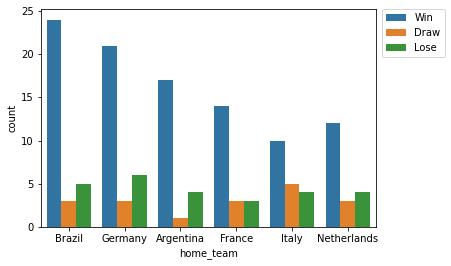

In [32]:
# Count Plot for results of top 10 home team countries that Won the most
p = sns.countplot(data=matches, x="home_team", hue="home_team_result", order=matches.home_team.value_counts().iloc[:6].index)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### Home Team Country and Number of Goals Scored

The table below shows the top 5 home teams with the highest average home goals scored. Surprisingly, none of the top 5 home teams with the most wins are in this table (i.e., Brazil, Germany, Argentina, France and Netherlands). This might suggest that the home teams with the most wins win by a small margin of victory.

In [33]:
grouped_matches_HTCGS = round(matches.groupby('home_team')[['home_team_score']].mean(), 2)
grouped_matches_HTCGS = grouped_matches_HTCGS.sort_values(by='home_team_score', ascending=False)
grouped_matches_HTCGS.head()

,home_team_score
home_team,
Turkey,3.00
Bosnia and Herzegovina,3.00
Russia,2.50
Bulgaria,2.33
Portugal,2.20


### Home Team Country and Number of Goals Conceded

The table below shows the top 5 home team countries with the highest average goals conceded. Korea DPR, Bolivia and Jamaica top the table, all with than average amount of goals conceded equalling 3. 

In [34]:
grouped_matches_HTCGC = round(matches.groupby('home_team')[['away_team_score']].mean(), 2)
grouped_matches_HTCGC = grouped_matches_HTCGC.sort_values(by='away_team_score', ascending=False)
grouped_matches_HTCGC.head()

,away_team_score
home_team,
Korea DPR,3.0
Bolivia,3.0
Jamaica,3.0
Slovakia,2.0
Slovenia,2.0


### Home Team Country, Shoot Out and Result

The table below shows all the home teams countries with a FIFA rank between 1 and 10 and their results when they had a penalty shoot out and when they didn't have a penalty shoot out. The table helps to summarize how home team countries ranked 1 to 10 did in their matches, where a 0 in the shoot out column indicates matches without a penalty shoot out and a 1 in the shoot out column indicates matches with a penalty shoot out. The main purpose of the table is to be used to create a bar plot shown further down. 

In [35]:
grouped_matches_total = matches[matches.home_team_fifa_rank < 11]
grouped_matches_total_country = grouped_matches_total.groupby(['home_team','shoot_out', 'home_team_result']).size().unstack()
grouped_matches_total_country

home_team_result          Draw  Lose   Win
home_team      shoot_out                  
Argentina      0           1.0   4.0  16.0
               1           NaN   NaN   1.0
Belgium        0           NaN   NaN   4.0
Brazil         0           3.0   5.0  21.0
               1           NaN   NaN   3.0
Chile          0           2.0   NaN   NaN
Colombia       0           NaN   1.0   4.0
Czech Republic 0           NaN   2.0   NaN
England        0           2.0   1.0   4.0
               1           NaN   1.0   NaN
France         0           3.0   2.0   5.0
Germany        0           2.0   4.0  12.0
Italy          0           3.0   4.0   3.0
Mexico         0           2.0   1.0   2.0
Netherlands    0           1.0   2.0   7.0
Norway         0           NaN   NaN   1.0
Poland         0           NaN   2.0   NaN
Portugal       0           2.0   1.0   7.0
Romania        0           NaN   1.0   1.0
               1           NaN   1.0   NaN
Spain          0           2.0   4.0   7.0
               1           NaN   NaN   1.0
Sweden         0           NaN   1.0   2.0
Switzerland    0           1.0   1.0   1.0
USA            0           NaN   1.0   NaN
Uruguay        0           NaN   1.0   1.0

Using the table above, a bar plot was generated below. The x axis displays all the home countries with a FIFA rank from 1 to 10 and whether their match had penalty shoot outs or not. A country name followed by a 1 indicates matches where a penalty shoot out took place where as a country name followed by a 0 depicts matches where a penalty shoot out did not occur. The y axis shows the amount of matches that the country played and also shows the number of matches with a result equalling a win, draw or loss. As seen in the bar plot, for countries that had matches without penalty shoot outs, Brazil and Argentina had the most wins and played the most games. As well, Brazil, France and Italy had the most draws in matches without penalty shoot outs and Brazil, Spain, Germany, Italy and Argentina are the home countries with the most amount of losses. For matches with penalty shoot outs, Brazil has the most wins and England and Romania are tied for the most losses. 

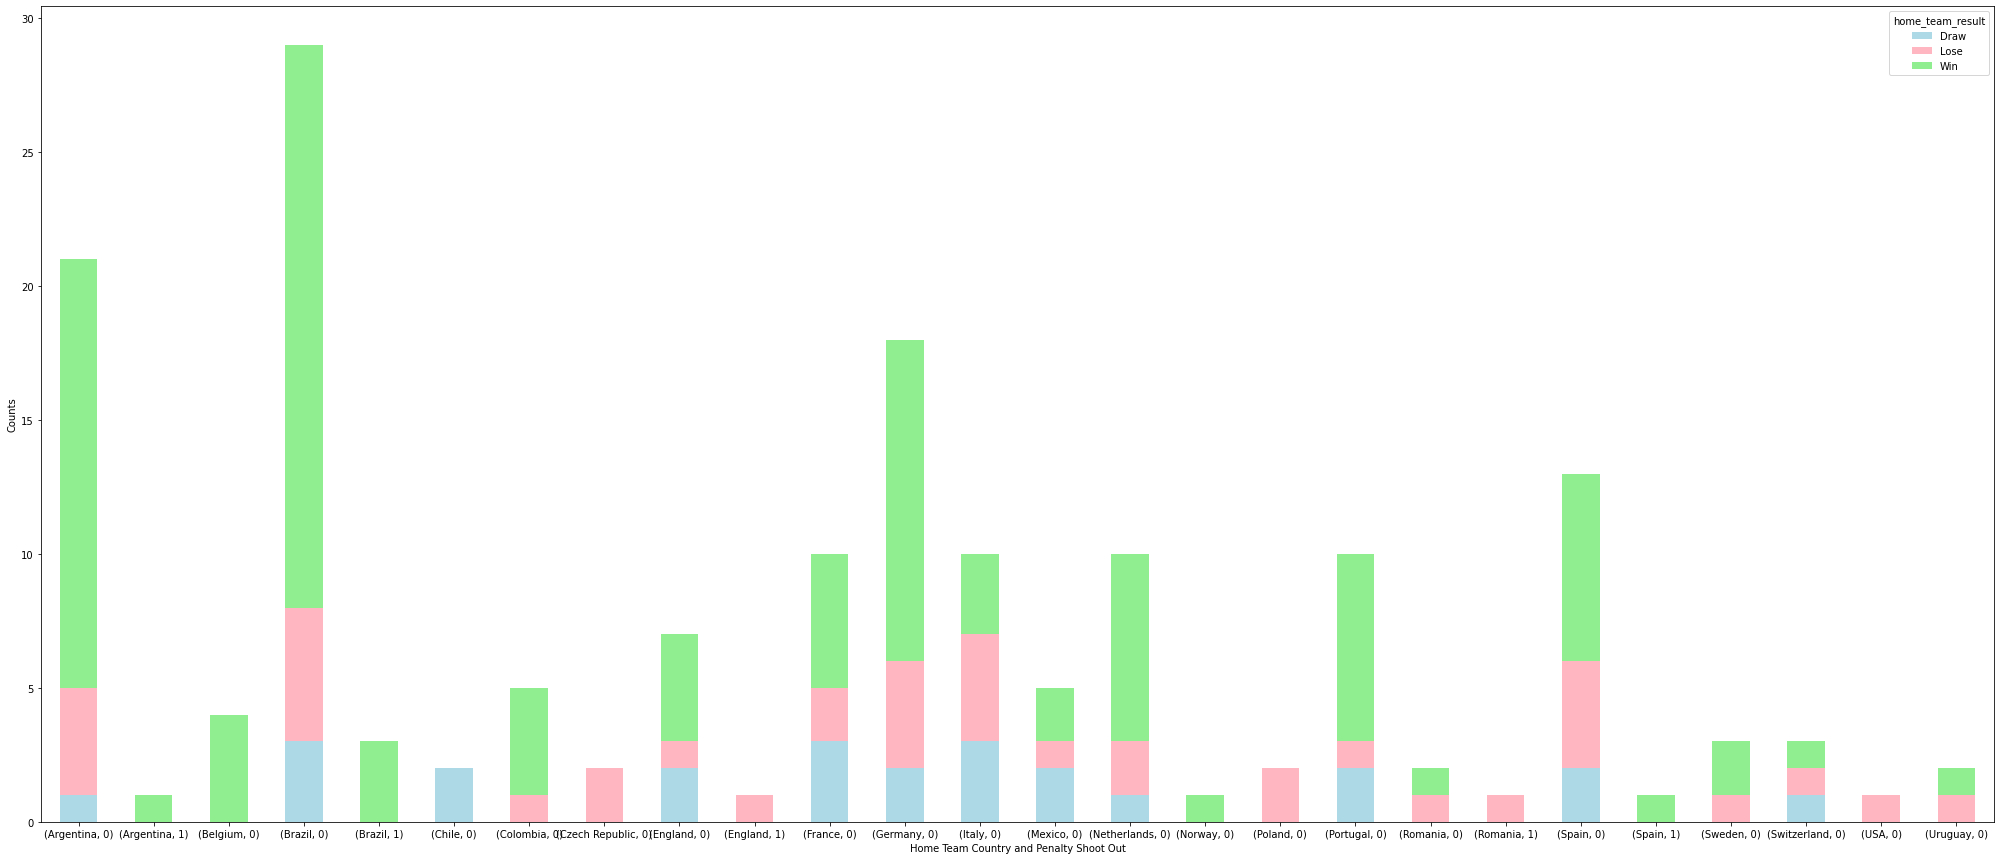

In [36]:
matches_barplot_country = grouped_matches_total_country.plot.bar(stacked=True, color = ["lightblue", "lightpink", "lightgreen"], figsize=(35,15))
plt.ylabel("Counts")
plt.xlabel('Home Team Country and Penalty Shoot Out')
plt.xticks(rotation=0)
plt.show(matches_barplot_country)

### Home Team FIFA Rank, Shoot Out and Result

The table below shows all the results for matches with and without penalties of the top 10 FIFA ranked home teams. A 0 in the shoot out column indicates matches without a penalty shoot out and a 1 in the shoot out column indicates matches with a penalty shoot out. The table below summarizes the results of the top 10 FIFA ranked teams in terms of matches with and without penalty shoot outs. The main purpose of the table is develop of bar plot shown further below. 

In [37]:
grouped_matches_total_rank = grouped_matches_total.groupby(['home_team_fifa_rank','shoot_out', 'home_team_result']).size().unstack()
grouped_matches_total_rank

home_team_result               Draw  Lose   Win
home_team_fifa_rank shoot_out                  
1                   0           2.0   6.0  14.0
                    1           NaN   NaN   1.0
2                   0           2.0   5.0  17.0
3                   0           4.0   3.0  10.0
                    1           NaN   NaN   2.0
4                   0           3.0   3.0  10.0
5                   0           4.0   3.0  11.0
6                   0           1.0   4.0   8.0
                    1           NaN   NaN   1.0
7                   0           1.0   5.0  12.0
                    1           NaN   1.0   NaN
8                   0           4.0   3.0   7.0
                    1           NaN   NaN   1.0
9                   0           2.0   3.0   3.0
10                  0           1.0   3.0   6.0
                    1           NaN   1.0   NaN

The bar plot plot uses the data from the table above to show the results for the top 10 FIFA rank home teams in matches with and without penalty shoot outs. The x axis represents the home team FIFA rank followed by a 1 or 0, where a 1 represents matches that had penalty shoot outs and a 0 represents matches that did not have penalty shoot outs. Based on the data from the table, for matches without penalty matches, the first and second FIFA ranked home teams have the most wins. The third, fifth and eighth FIFA ranked teams had the most number of draws. The first, second and seventh ranked home teams had the most losses. In terms of games where penalty shoot outs occured, the third FIFA ranked home team had the most number of wins whereas the seventh and tenth ranked home teams had the most losses.

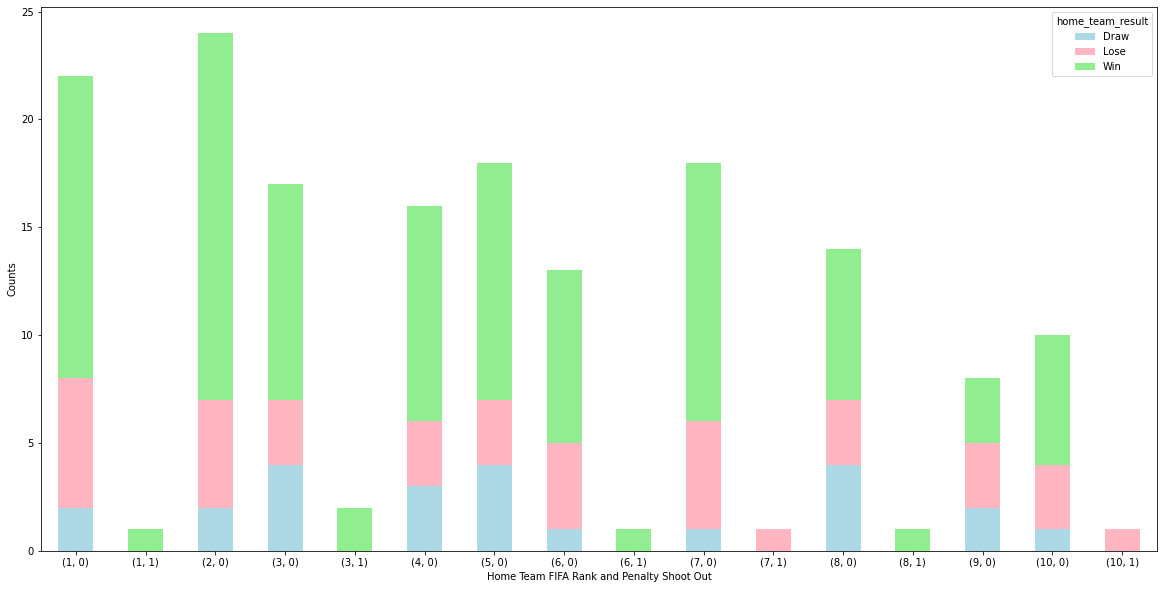

In [38]:
matches_barplot_rank = grouped_matches_total_rank.plot.bar(stacked=True, color = ["lightblue", "lightpink", "lightgreen"], figsize=(20,10))
plt.ylabel("Counts")
plt.xlabel('Home Team FIFA Rank and Penalty Shoot Out')
plt.xticks(rotation=0)
plt.show(matches_barplot_rank)

## Discussion

In this assignment, I studied the World Cup data. I analyzed the relationship between FIFA rank and home team country on the outcome of games and the number of goals scored for and against. The exploratory analysis conducted supported the hypotheses that FIFA rank and home team country had a relationship between the outcome of games and the number of goals scored and conceded. In terms of FIFA rank and outcome of the match, countries that had a higher FIFA rank won more matches, especially if they ranked within the top 10 of the FIFA standings. Surprisingly, these high ranked teams also had more losses no matter if they played as the home or away team. This may be due to these high ranked teams playing more games or qualifying for the World Cup more leading to them having more losses. These high ranked teams also drew their games a lot when they played as the home team, but middle ranked teams (i.e., 20th to 40th ranked) drew more when they played as the away team. For FIFA rank and goals scored, the mean number of goals per match for both home and away teams was higher for both middle or lower ranked (i.e., 41st rank and below) than higher ranked teams. This indicates that middle and lower ranked teams scored more goals per game in general. More generally though, it was discovered that as the FIFA rank of the team decreased or got higher in value the less goals they scored according to the regression plots. In terms of FIFA rank and goals conceded, the low ranked teams conceded a lot more goals per game than the other teams no matter if they played as the home or away team. This data was reflected in both the tables and the regression plots. For home team country and outcomes of their matches, Brazil and Germany won the most games, Japan and Germany lost the most games and Italy and Japan drew the most games. When comparing home team country and number of goals scored, Turkey and Bosnia and Herzegovina scored the most goals per home game. In terms of home team country and number of goals conceded, Korea DPR and Bolivia conceded the most goals per home game. These results indicate that although Brazil and Germany won most of their World Cup games as the home team, they didn't score a lot of goals per home game. This could suggest that Brazil and Germany won a lot of their games by small margins of victory. It was also discovered that Brazil had the most wins in home games that had penalty shoot outs and home games without penalty shoot outs. For high FIFA ranked teams, the second FIFA ranked team won the most games in home games without penalty shoot outs, but for home games that had penalty shoot outs, the third FIFA ranked team had the most wins. These analyses confirm that the higher ranked a country is in the FIFA rankings the more likely they are to win the match, but this doesn't mean that they will score a lot of goals. In terms of home team country and advantages gain for being the home team a relationship could not be determined by the analysis, but it was discovered that home team countries with the most wins don't necessarily score the most goals. Based on the [current FIFA rankings](https://www.fifa.com/fifa-world-ranking/men?dateId=id13792) and the analyses conducted, it could be suggested that current second ranked FIFA team, which is Belgium, are most likely to win more matches both home and away at the current 2022 FIFA World Cup. Or based on past results, Brazil would win more matches as the home team. For both Belgium and Brazil, although they are likely to win more matches, they may not score a lot of goals and would most likely win most of their games by scoring 1 or 2 goals max. If most games went to penalty shoot outs though, I would favour Brazil or Argentina (who are ranked 3rd in the FIFA rankings). So based on the analyses, the expected winner for the 2022 World Cup is either Brazil or Belgium. 

## References
1. Source Data: https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022
2. Introduction Research:
    - https://en.wikipedia.org/wiki/FIFA_World_Cup
    - https://sportsbrief.com/facts/teams/27237-how-different-countries-won-fifa-world-cup/
    - https://www.offersville.com/many-different-countries-played-world-cup-played/#:~:text=There%20have%20been%20a%20total%20of%2079%20different,teams%20joining%2C%20at%2013%2C%20and%201934%2C%20at%2010.
    - https://www.fifa.com/tournaments/mens/worldcup
3. Pandas for data manipulation
4. Seaborn for data visualization
5. Matplotlib for data visualization
6. Current Men's Soccer Country FIFA rankings: https://www.fifa.com/fifa-world-ranking/men?dateId=id13792